1. 시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/student_data.csv')
data.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [2]:
grade_type = data['grade'].value_counts()
grade_type

9     50
11    40
12    39
10    36
13    34
15    31
8     29
14    28
7     19
6     17
4     15
5     12
16    12
17     9
18     9
2      7
19     4
3      3
1      1
Name: grade, dtype: int64

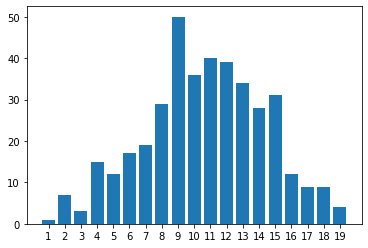

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(grade_type.index, grade_type.values, width = 0.8, bottom=None, align='center')
plt.xticks(grade_type.index)
plt.show()

종속변수인 'grade' 변수는 1부터 19까지의 등급으로 이루어져 있는 것을 알 수 있으며 약간 정규분포 모형을 띄고 있다.

In [41]:
import scipy.stats as stats
stats.shapiro(data['grade'])

ShapiroResult(statistic=0.9871252179145813, pvalue=0.0014302099589258432)

정규성 검사 결과 p-value값이 0.05보다 작기 때문에 정규성을 띄고 있지 않음을 확인하였다. 

해당 종속변수의 값이 정규성을 띄고 다양한 값이 있기 때문ㅇ에 다중 classification으로 예측하는 것 보다는 회귀분석을 진행하는 것이 좋을 것으로 판단

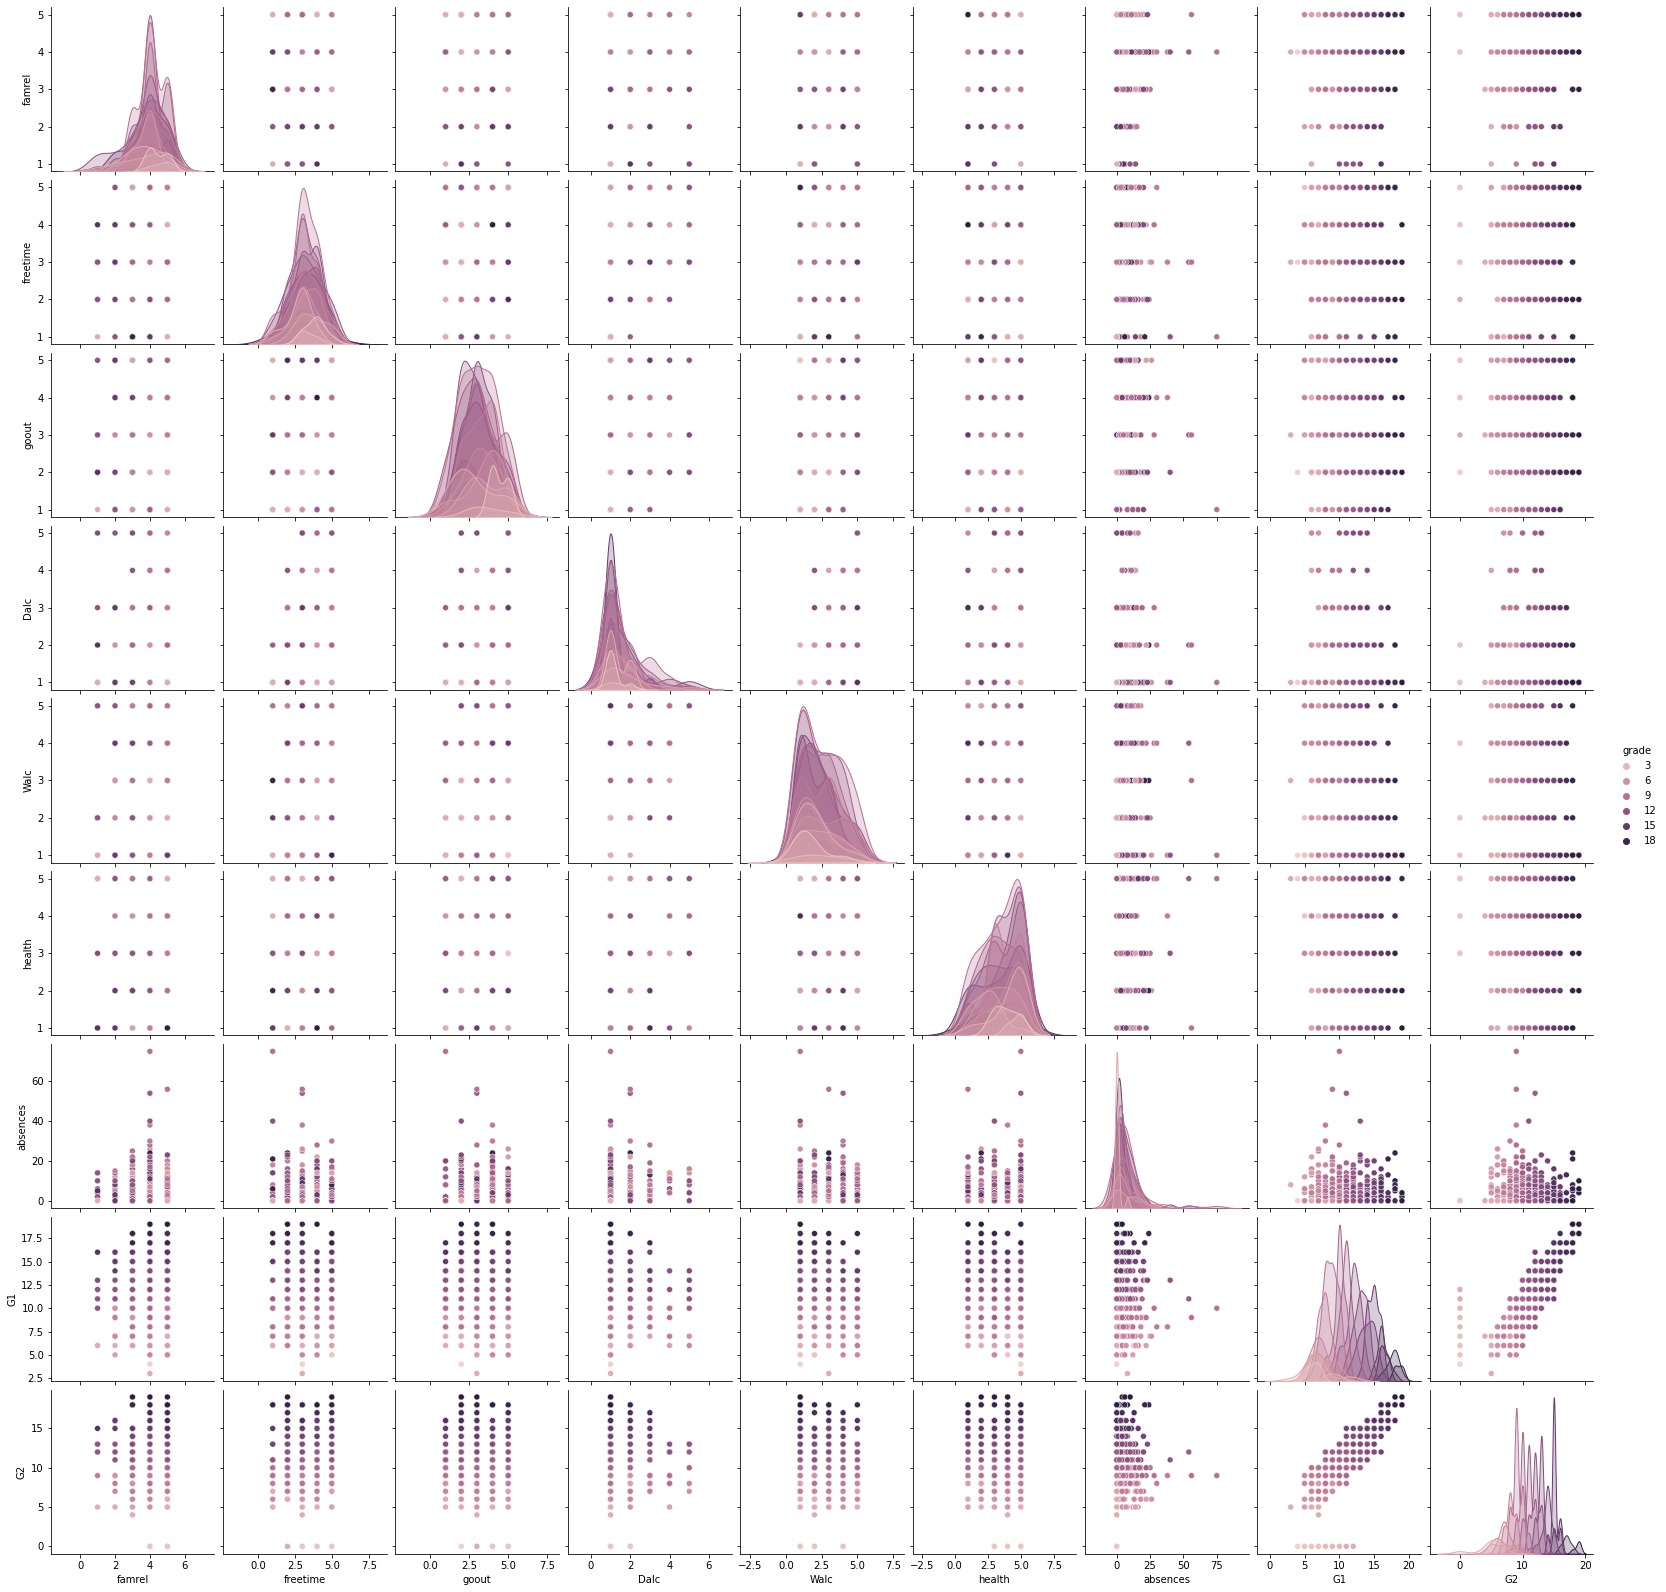

In [9]:
import seaborn as sns
sns.pairplot(data, diag_kind='auto', hue='grade')
plt.show()

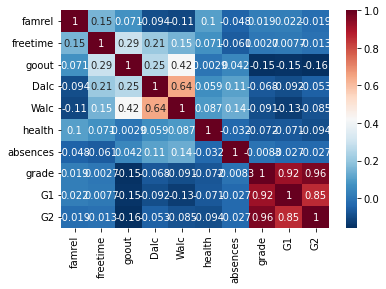

In [34]:
data_cor = data.corr(method='pearson')
sns.heatmap(data_cor, xticklabels=data_cor.columns,
            yticklabels=data_cor.columns,
            cmap='RdBu_r', annot=True)
plt.show()

G1-G2 변수의 상관관계는 0.85, Dalc-Walc 변수의 상관계수는 0.64로 양의 상관관계가 존재하지만, 다른 변수들 간의 상관관계는 없는 것으로 확인함

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


'school', 'sex', 'paid', 'activities' 변수는 범주형 변수

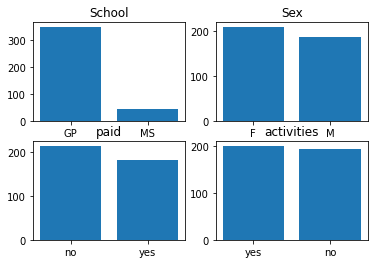

In [33]:
fig,axs = plt.subplots(2,2)


axs[0][0].bar(data['school'].value_counts().index, data['school'].value_counts().values)
axs[0][0].set_title('School')

axs[0][1].bar(data['sex'].value_counts().index, data['sex'].value_counts().values)
axs[0][1].set_title('Sex')

axs[1][0].bar(data['paid'].value_counts().index, data['paid'].value_counts().values)
axs[1][0].set_title('paid')


axs[1][1].bar(data['activities'].value_counts().index, data['activities'].value_counts().values)
axs[1][1].set_title('activities')

plt.show()

'School'변수에만 비대칭이 존재함

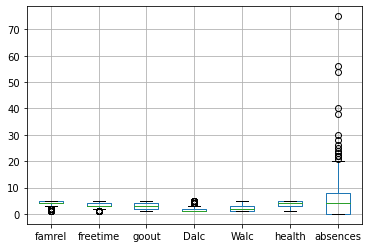

In [39]:
float_cols = data[['famrel','freetime','goout','Dalc','Walc','health','absences']]
float_cols.boxplot()
plt.show()

다른 변수들에서는 큰 이상치가 발견되지 않았지만, 'absences' 변수에서는 이상치가 눈에띔

2. 결측치를 식별, 예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명하시오.

In [42]:
data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

'famrel' , 'freetime', 'goout', 'Dalc', 'Walc' 수치형 변수에서만 결측치가 존재하는 것을 확인

In [43]:
data.isna().sum()/len(data)

school        0.000000
sex           0.000000
paid          0.000000
activities    0.000000
famrel        0.002532
freetime      0.005063
goout         0.007595
Dalc          0.010127
Walc          0.005063
health        0.010127
absences      0.007595
grade         0.000000
G1            0.000000
G2            0.000000
dtype: float64

In [44]:
data[data.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


결측치가 존재하는 컬럼에서의 결측치 비율은 크게 높지 않고, 한 행이 모두 결측치인 경우는 존재하지 않으므로 삭제보다는 대체

1. 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보관할 수 있으며, 명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있다.
2. KNN을 이용한 결측치 대체 : 보간법 중 결측치가 없는 컬럼의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체

In [45]:
from sklearn.impute import KNNImputer

#결측치가 있는 수치형 데이터만을 추출
KNN_data = data.drop(columns=['school','sex','paid','activities'])

imputer = KNNImputer()
data_filled = imputer.fit_transform(KNN_data)
data_filled = pd.DataFrame(data_filled, columns=KNN_data.columns)
data[KNN_data.columns] = data_filled

data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.

이산형 변수 : school, sex, paid, activities는 이산형 변수이므로 boolean타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수를 사용가능하도록 변환하였다.

In [46]:
data = pd.get_dummies(data=data, columns=['school','sex', 'paid','activities'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


4. 데이터 분할 방법을 2가지 쓰고, 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오.

1. 랜덤 분할 : train, test 데이터셋을 나누어 학습된 데이터를 검증할 수 있으며, 분할 시에 무작위로 사용자가 지정하여 비율로 분할한다. 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트용 데이터를 나누어 적용시키는 이윤ㄴ 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한 지를 검증하기 위함이다.

2. 층화 추출 결과 : 종속변수가 범주형 변수인 경우에는 종속변수의 클래스의 비율을 기준으로 학습용 데이터와 트세트용 데이터의 비율이 동일하게 분할한다. 즉, 클래스의 편향을 막을 수 있다.

-> 해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여 7:3 비율로 분할하였다.

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('grade', axis=1)
y = data['grade']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(276, 13) (119, 13)
(276,) (119,)


5. SVM, XGBoost, RandomForest 3개의 알고리즘 공통점을 쓰고, 학생 성적 예측 분석에 적합한 알고리즘 인지 설명하시오.

- 회귀분석과 분류분석을 모두 할 수 있는 분석 알고리즘
- 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다.
- 과대적합, 과소적합을 피하기 위한 매개변수의 설정이 필요하다.
- 회귀분석에서 다중공선성의 문제를 해결 할 수 있다.

해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 회귀분석에서 다중공선성의 문제를 해결하는 것이 중요한데, svm은 커널트릭을 통해, XGBoost와 RandomForest는 트리모델을 통해 다중공선성을 해결할 수 있다. 그러므로 회귀분석을 지원하는 위 3가지 알고리즘은 연속형 변수를 예측하기에 적합하다.

6. 세가지 모델 모두 모델링 해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [48]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                              columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10]}]
grid_svm = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.960941
11,10.0,0.010,0.957198
16,100.0,0.010,0.947652
10,10.0,0.001,0.941800
6,1.0,0.010,0.921494
12,10.0,0.100,0.861286
17,100.0,0.100,0.857767
7,1.0,0.100,0.785883
5,1.0,0.001,0.303419
2,0.1,0.100,0.283644


parameter 값이 C : 100, gamma : 0.001일 떄, test_score 점수가 0.96으로 가장 높음

In [50]:
svr = SVR(C=100, gamma=0.001)
svr.fit(X_train_scaled, y_train)

print('R2 : ', svr.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, svr.predict(X_test_scaled))))

R2 :  0.9574163452579305
RMSE :  0.7753004545895872


In [51]:
rf_grid = [{'max_depth' : range(2,12,2),
            'min_samples_split': range(2,12,2)}]
rf = GridSearchCV(RandomForestRegressor(n_estimators=100), 
                  param_grid=rf_grid, cv=5)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

print('R2 : ', rf.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 :  0.9520407603148784
RMSE :  0.8227818773530773


In [62]:
xgb_grid = [{'max_depth':[2,4,6,8,10]}]
xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid = xgb_grid, cv=5)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print('R2 : ',xgb.score(X_test_scaled, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, xgb_pred)))

R2 :  0.9565388277899283
RMSE :  0.7832479925107609


XGB의 모델 정확도가 가장 높음

In [58]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

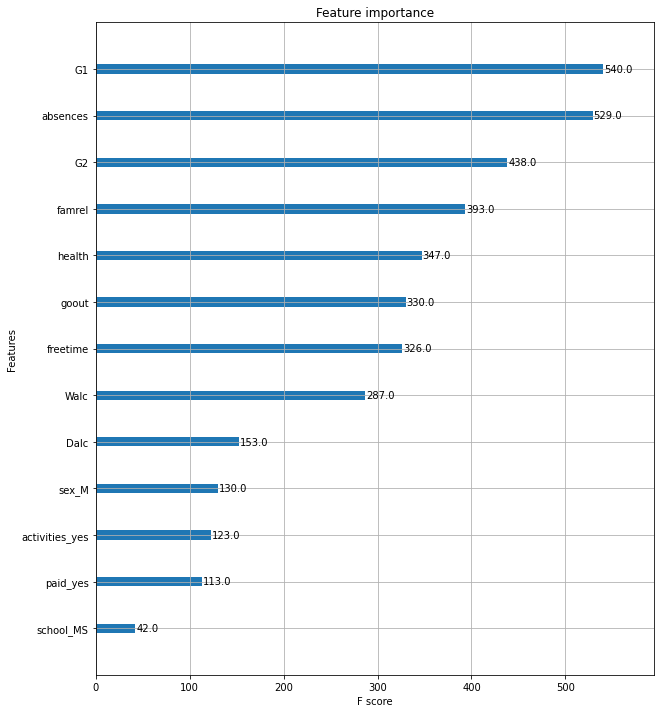

In [64]:
from xgboost import plot_importance

xgb = XGBRegressor(n_estimators = 1000, max_depth=6)
xgb.fit(X_train_scaled, y_train)
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

XGBoost 모델이 가장 정확도가 높고, RMSE 값이 낮으므로 예측 분석력이 좋아 가장 적합한 알고리즘으로 선택하였다. XGBoost분석결과 G1 변수가 최종 성적에 영향을 많이 주는 것으로 보였다.

G1, G2가 grade와 상관성이 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때는 정확도가 낮게 나온다. 현업에서는 정확도만을 보고 변수를 선택하는 것을 주의해야한다.

해당 모델의 주 변수로 G1, G2 변수를 사용할 수는 있지만, 이 또한 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를 찾기에는 어려워보인다.. 머신러닝은 어떤 독립변수를 선택하느냐에 따라 결과 해석이 완전히 달라질 수 있다. 만약 학생의 성적에 영향을 미치는 변수를 찾고싶다면, 성적과 밀접 관련이 있는 추가적인 변수를 추가해야 한다. 그러면 모델의 정확성 뿐만 아니라 의미있는 분석이 될 것이라고 생각한다.